In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("/home/murali/Documents/HireOps/forecast_hiring - Sheet1(1).csv")
print(dataset.head())

   Employee turnover rate  Employee retention rate  \
0                    8.50                    91.50   
1                    9.00                    91.00   
2                    6.00                    94.00   
3                    5.45                    94.55   
4                    4.50                    95.50   

   Organisation Expansion index  No of Large scale projects  \
0                           0.3                          34   
1                           0.5                          45   
2                           0.5                          47   
3                           0.4                          46   
4                           0.3                          44   

   No of medium and small scale projects     NIFTY    SENSEX  NIFTY IT  \
0                                      7  21658.25  71968.72  34835.25   
1                                      8  17662.15  72240.26  35515.12   
2                                     10  19189.05  59549.92  29563.23   


In [2]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Employee turnover rate                 31 non-null     float64
 1   Employee retention rate                31 non-null     float64
 2   Organisation Expansion index           31 non-null     float64
 3   No of Large scale projects             31 non-null     int64  
 4   No of medium and small scale projects  31 non-null     int64  
 5   NIFTY                                  31 non-null     float64
 6   SENSEX                                 31 non-null     float64
 7   NIFTY IT                               31 non-null     float64
 8   GDP                                    31 non-null     int64  
 9   Gross profit margin                    31 non-null     float64
 10  Working Capital                        31 non-null     int64  
 11  Quick Ra

[]

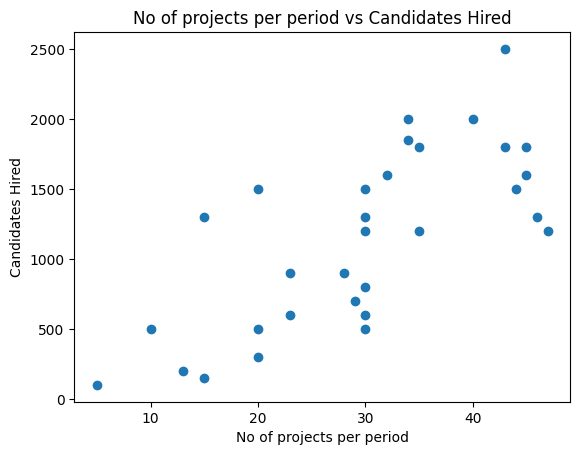

In [3]:
plt.scatter(dataset["No of Large scale projects"],dataset["Candidates Hired"])
plt.title("No of projects per period vs Candidates Hired")
plt.xlabel("No of projects per period")
plt.ylabel("Candidates Hired")
plt.plot()

[]

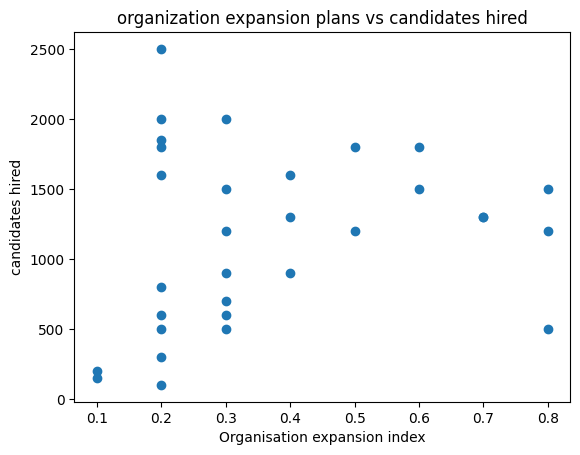

In [4]:
plt.scatter(dataset["Organisation Expansion index"],dataset["Candidates Hired"])
plt.title("organization expansion plans vs candidates hired")
plt.xlabel("Organisation expansion index")
plt.ylabel("candidates hired")
plt.plot()

[]

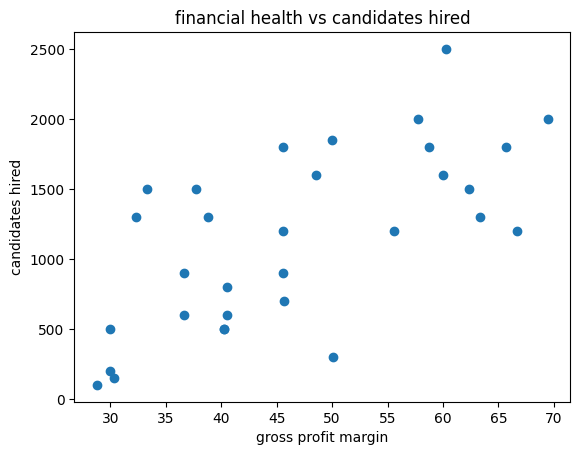

In [5]:
plt.scatter(dataset["Gross profit margin"],dataset["Candidates Hired"])
plt.title("financial health vs candidates hired")
plt.xlabel("gross profit margin")
plt.ylabel("candidates hired")
plt.plot()

In [6]:
from sklearn.preprocessing import StandardScaler
Y = dataset['Candidates Hired']
X = dataset.drop("Candidates Hired",axis=1)
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X)
#scaled_X = pd.DataFrame(scaled_data,columns=["Employee turnover rate","Employee retention rate","Organisation Expansion index","No of Large scale projects","No of medium and small scale projects","NIFTY","SENSEX","NIFTY IT","GDP","Gross profit margin","Working Capital","Quick Ratio","Return on Equity"])


In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,Y)



RandomForestRegressor()

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)  
knn_model.fit(X,Y)

KNeighborsRegressor(n_neighbors=3)

In [9]:
data_0 = 8.5
data_1 = 91.5
data_2 = 0.3
data_3 = 34
data_4 = 7
data_5 = 21658.25
data_6 = 71968.72
data_7 = 34835.25
data_8 = 20974620
data_9 = 69.45
data_10 = 54203
data_11 = 1.77
data_12 = 18.5


In [10]:
data_to_predict = [[data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11, data_12]]
#scaled_data = scaler.fit_transform(data_to_predict)
predicted_candidates_hired = model.predict(data_to_predict)
print(predicted_candidates_hired)



[1877.]


/home/murali/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [12]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
perform_adf_test(Y)
#non-stationary 

ADF Statistic: -2.284198
p-value: 0.177115


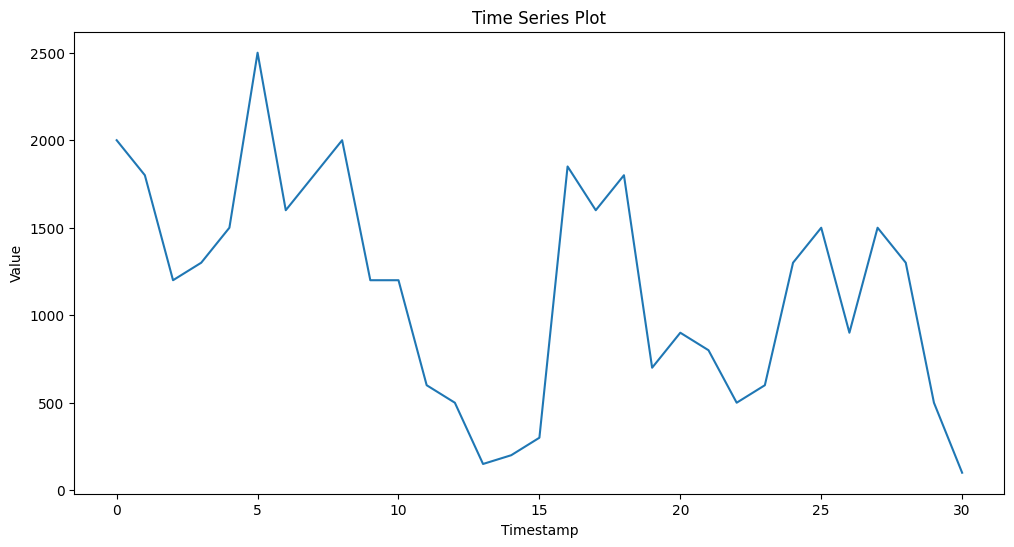

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.plot(Y)
plt.title('Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

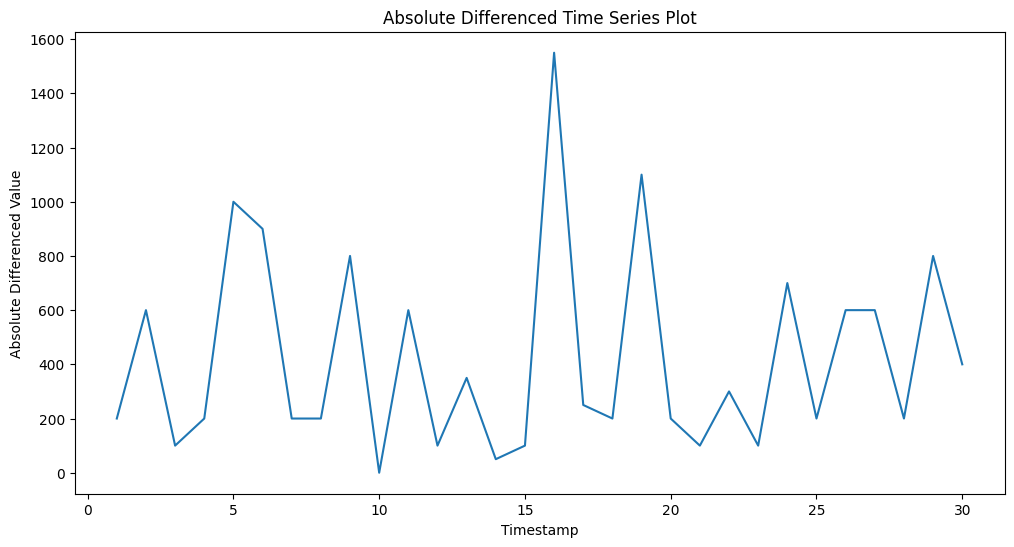

In [14]:
import pandas as pd
df = pd.DataFrame({'Value':Y})
df['Value_diff'] = df['Value'].diff()
df['Value_diff_abs'] = df['Value_diff'].abs()
df = df.dropna()
plt.figure(figsize=(12, 6))
plt.plot(df['Value_diff_abs'])
plt.title('Absolute Differenced Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Absolute Differenced Value')
plt.show()


In [15]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(Y, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=486.157, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=490.632, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=480.765, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=483.963, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=534.901, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=482.656, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=482.700, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=484.690, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=484.853, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.119 seconds


In [17]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(Y, order=(1, 0, 0))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Candidates Hired   No. Observations:                   31
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -237.374
Date:                Mon, 08 Jan 2024   AIC                            480.748
Time:                        11:25:06   BIC                            485.050
Sample:                             0   HQIC                           482.150
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1150.8141    228.149      5.044      0.000     703.651    1597.977
ar.L1          0.5990      0.162      3.694      0.000       0.281       0.917
sigma2      2.585e+05   8.08e+04      3.199      0.001       1e+05    4.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.92   Prob(JB):                         0.38
Heteroskedasticity (H):               0.75   Skew:                             0.61
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
forecast_steps = 4  
forecast_results = model.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
print("Forecasted Values:")
print(forecast_values)



Forecasted Values:
31     521.364030
32     773.766060
33     924.957856
34    1015.523528
Name: predicted_mean, dtype: float64


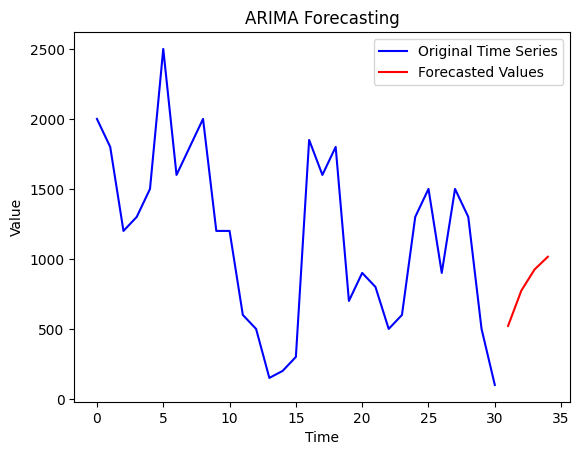

In [19]:
import matplotlib.pyplot as plt
plt.plot(Y, label='Original Time Series', color='blue')
plt.plot(range(len(Y), len(Y) + forecast_steps), forecast_values, label='Forecasted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()
